<h1> Necessary Libraries </h1>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from scipy.stats import norm
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc

from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("archive/banana_quality.csv")
df.head()

,Size,Weight,Sweetness,Softness,HarvestTime,Ripeness,Acidity,Quality
0,-1.924968,0.468078,3.077832,-1.472177,0.294799,2.435570,0.271290,Good
1,-2.409751,0.486870,0.346921,-2.495099,-0.892213,2.067549,0.307325,Good
2,-0.357607,1.483176,1.568452,-2.645145,-0.647267,3.090643,1.427322,Good
3,-0.868524,1.566201,1.889605,-1.273761,-1.006278,1.873001,0.477862,Good
4,0.651825,1.319199,-0.022459,-1.209709,-1.430692,1.078345,2.812442,Good


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Size         8000 non-null   float64
 1   Weight       8000 non-null   float64
 2   Sweetness    8000 non-null   float64
 3   Softness     8000 non-null   float64
 4   HarvestTime  8000 non-null   float64
 5   Ripeness     8000 non-null   float64
 6   Acidity      8000 non-null   float64
 7   Quality      8000 non-null   object 
dtypes: float64(7), object(1)
memory usage: 500.1+ KB


In [4]:
df.duplicated().sum()

0

In [5]:
df.isnull().sum()

Size           0
Weight         0
Sweetness      0
Softness       0
HarvestTime    0
Ripeness       0
Acidity        0
Quality        0
dtype: int64

In [6]:
df.describe()

,Size,Weight,Sweetness,Softness,HarvestTime,Ripeness,Acidity
count,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,-0.747802,-0.761019,-0.770224,-0.014441,-0.751288,0.781098,0.008725
std,2.136023,2.015934,1.948455,2.065216,1.996661,2.114289,2.293467
min,-7.998074,-8.283002,-6.434022,-6.959320,-7.570008,-7.423155,-8.226977
25%,-2.277651,-2.223574,-2.107329,-1.590458,-2.120659,-0.574226,-1.629450
50%,-0.897514,-0.868659,-1.020673,0.202644,-0.934192,0.964952,0.098735
75%,0.654216,0.775491,0.311048,1.547120,0.507326,2.261650,1.682063
max,7.970800,5.679692,7.539374,8.241555,6.293280,7.249034,7.411633


<h1> Distribution of target variable </h1>

Quality
Good    4006
Bad     3994
Name: count, dtype: int64


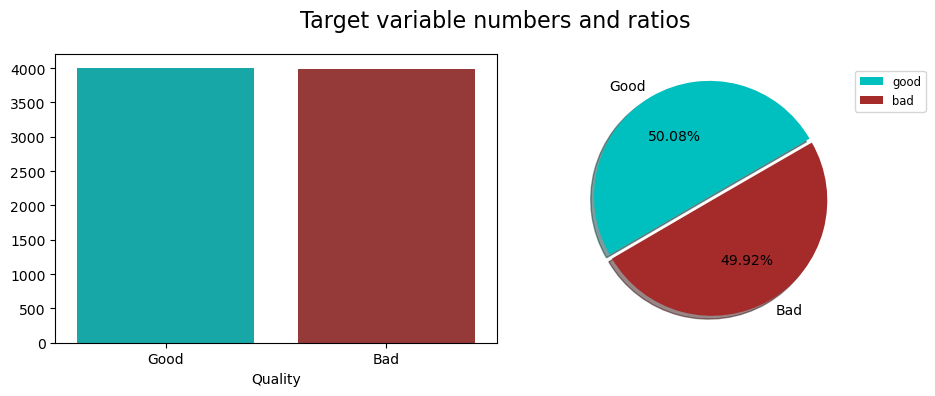

In [8]:
plt.figure(figsize=(10,4))
cols = ["c", "brown"]
plt.subplot(1,2,1)
sns.barplot(x=df["Quality"].value_counts().index, y=df["Quality"].value_counts(), palette=cols)
plt.ylabel("")
plt.subplot(1,2,2)
plt.pie(x=df["Quality"].value_counts(), labels=df["Quality"].value_counts().index, shadow=True,
        explode=[0.02, 0.02], startangle=30, autopct='%0.2f%%', colors=cols)
plt.legend(labels=["good", "bad"], loc=(1,0.8), fontsize="small")
plt.suptitle("Target variable numbers and ratios", fontsize=16)
plt.tight_layout()
print(df.Quality.value_counts())
plt.show()

<h1> Distributions of numerical variables </h1>

In [9]:
num_cols = df.select_dtypes(include=["float64"]).columns

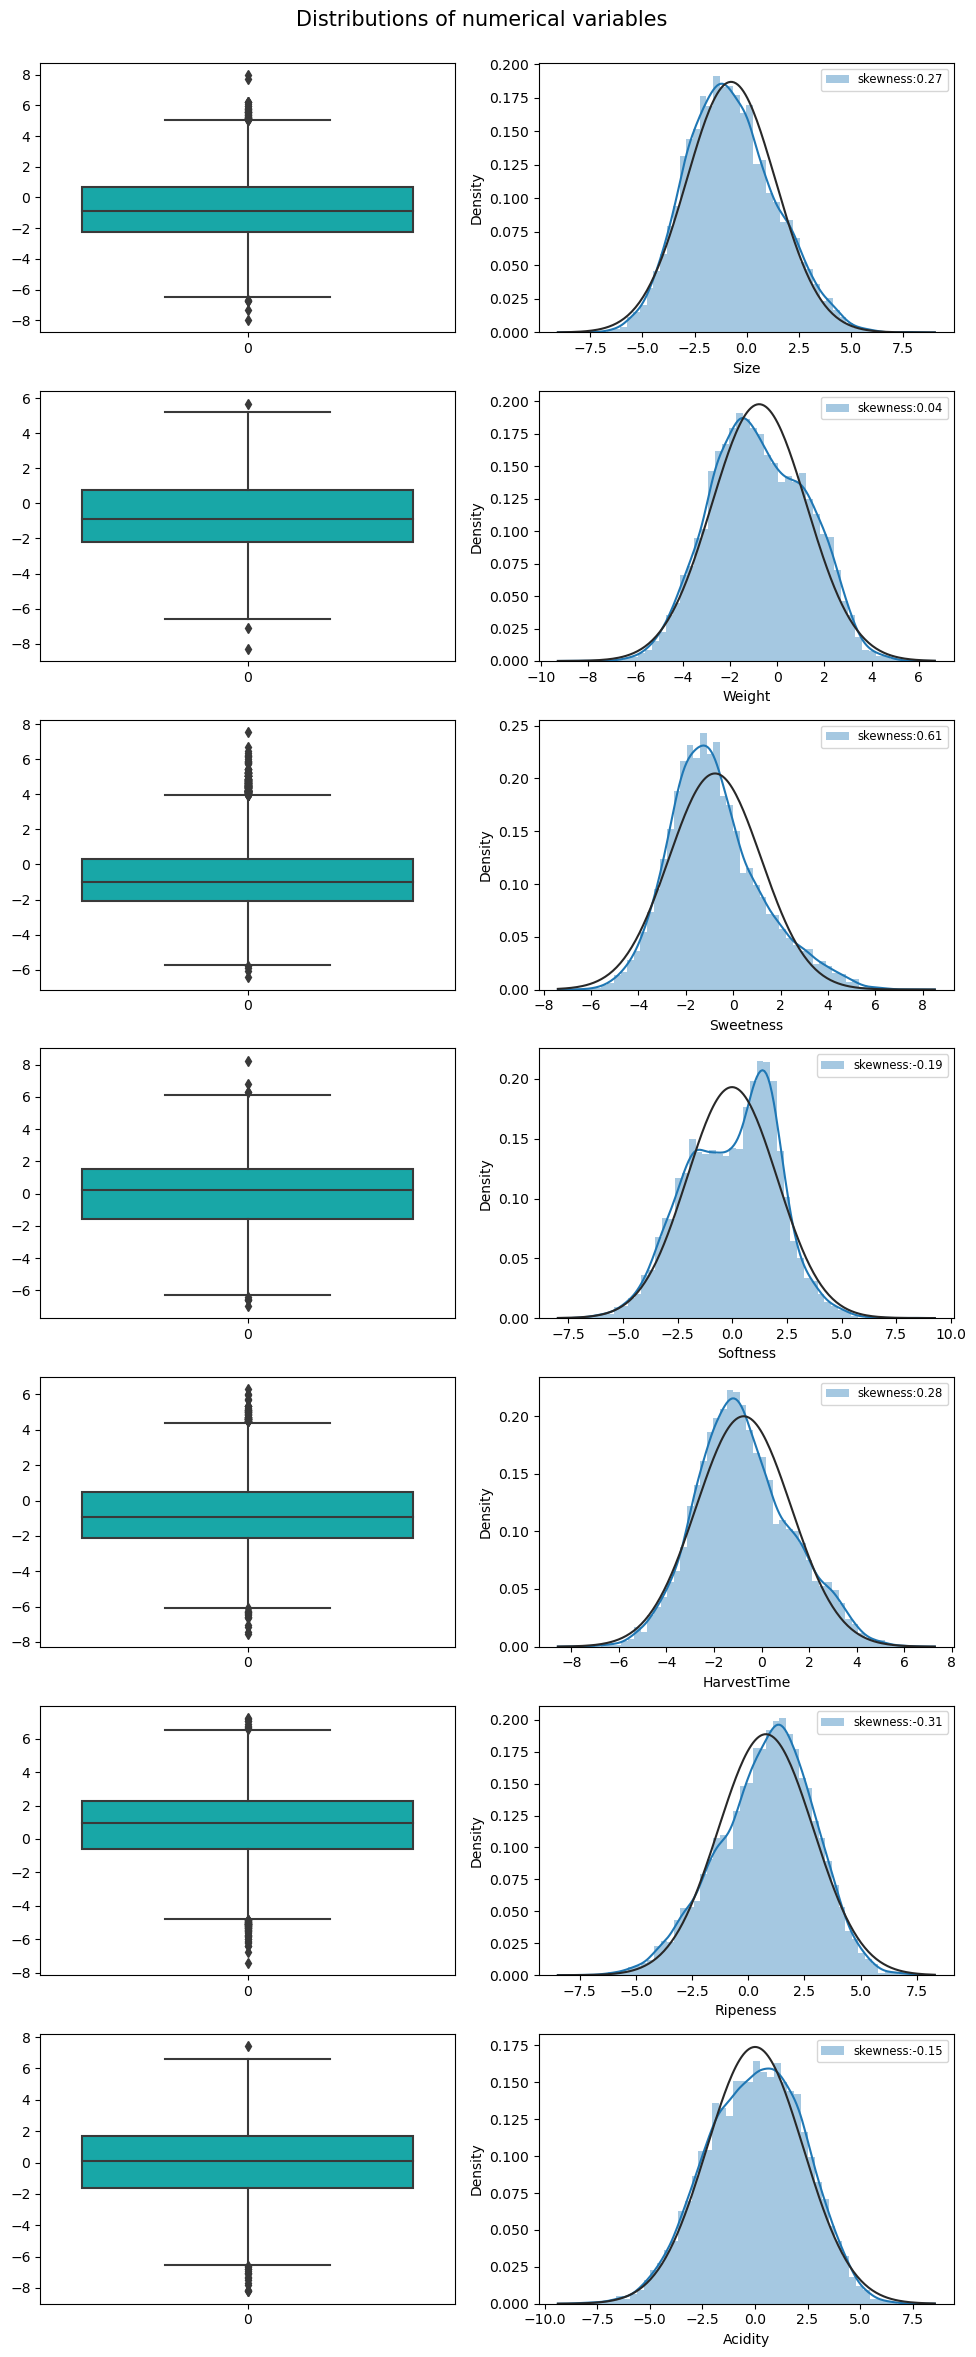

In [10]:
plt.figure(figsize=(10,24))
j = 1
for i in num_cols:
    plt.subplot(7,2, j)
    sns.boxplot(df[i], color="c")
    plt.subplot(7,2, j+1)
    sns.distplot(df[i], label=f"skewness:{df[i].skew():.2f}", fit=norm)
    j = j +2
    plt.legend(fontsize="small")
    plt.suptitle("Distributions of numerical variables\n\n", fontsize=15)
plt.tight_layout()
plt.show()

<h1> Outliers </h1>

In [11]:
def clean_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - (IQR * 1.5)
    upper_limit = Q3 + (IQR * 1.5)
    data = data[~((data[column] > upper_limit) | (data[column] < lower_limit))]
    return data

for i in num_cols:
    df = clean_outliers(df, i)

<h1> Correlation between Features </h1>

In [12]:
df["Quality"] = df["Quality"].map({"Good":1, "Bad":0})

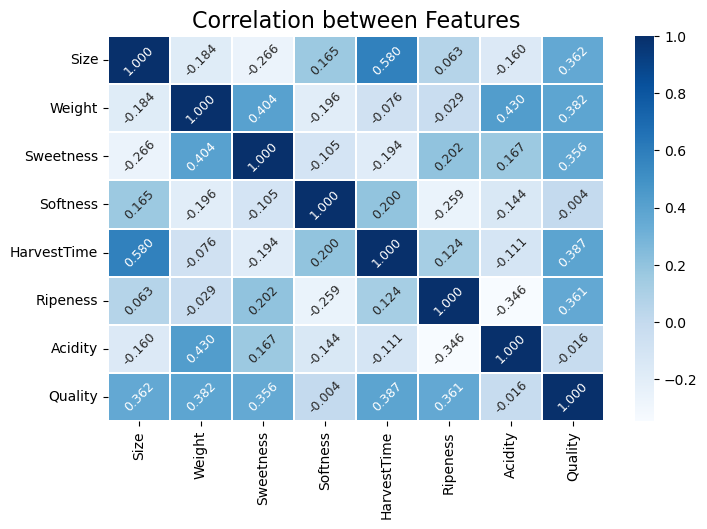

In [16]:
plt.figure(figsize=(8,5))
sns.heatmap(df.corr(), linewidths=0.05, annot=True,
            annot_kws={'size': 9, 'rotation': 45}, fmt='.3f', cmap="Blues")
plt.xticks(fontsize=10), plt.yticks(fontsize=10)
plt.title("Correlation between Features", fontsize=16)
plt.show()

<h1> Standardization </h1>

**_It may not be done because the variance values are not high._**

In [17]:
scaler = StandardScaler()
df.iloc[:,:-1] = scaler.fit_transform(df.iloc[:,:-1])

<h1> train/test split </h1>

In [18]:
y = df["Quality"]
X = df.drop(["Quality"], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

<h1> Comparison of Models </h1>

In [19]:
model_list = [SVC(), MLPClassifier()]

model_name_list = []
model_accuracies = []

for i in model_list:
    model = i.fit(X_train, y_train)
    model_name = model.__class__.__name__
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    model_name_list.append(model_name)
    model_accuracies.append(accuracy)
    
    print(f"{model_name} accuracy: {accuracy:.3f}\n")

SVC accuracy: 0.983

MLPClassifier accuracy: 0.983



<h1> Tuned Model (SVC) </h1>

In [27]:
# Step 1: Tune SVM classifier using GridSearchCV
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto'],
    'kernel': ['linear', 'rbf']
}
svm_model = SVC(random_state=6)
grid_search = GridSearchCV(svm_model, param_grid, cv=5)
grid_search.fit(X_train, y_train)
best_svm_model = grid_search.best_estimator_

In [28]:
# Step 2: Make predictions and calculate accuracy
y_pred_svm = best_svm_model.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"Accuracy using SVM: {accuracy_svm:.2f}")

Accuracy using SVM: 0.98


In [29]:
# Step 3: Print classification report
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1157
           1       0.99      0.98      0.98      1141

    accuracy                           0.98      2298
   macro avg       0.98      0.98      0.98      2298
weighted avg       0.98      0.98      0.98      2298



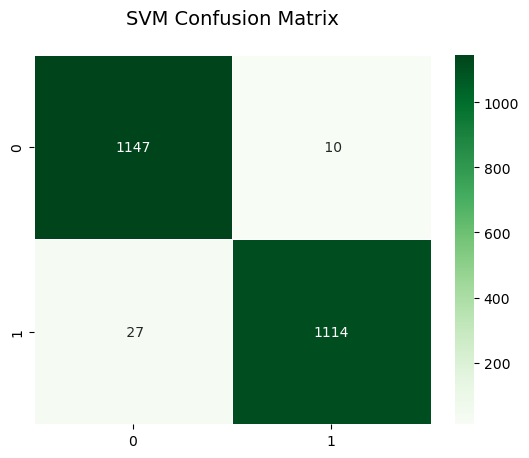

In [30]:
# Step 4: Plot confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, fmt='3g', linewidths=0.6, cmap="Greens")
plt.title("SVM Confusion Matrix\n", fontsize=14)
plt.show()

In [31]:
# Step 5: Calculate ROC curve and AUC
y_prob_svm = best_svm_model.decision_function(X_test)
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test, y_prob_svm)
roc_auc_svm = auc(fpr_svm, tpr_svm)

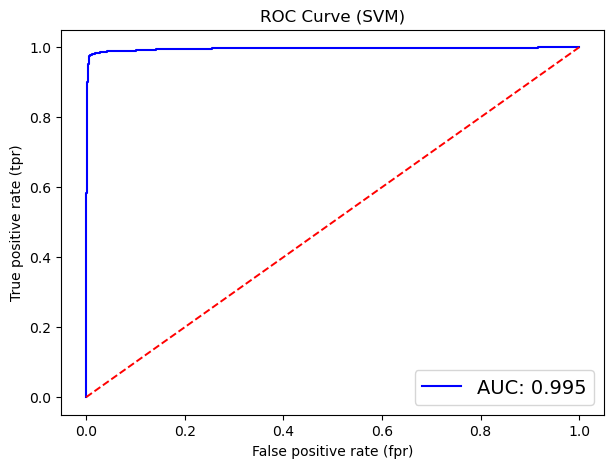

In [32]:

# Step 6: Plot ROC curve
plt.figure(figsize=(7,5))
plt.plot(fpr_svm, tpr_svm, color="blue", label= f"AUC: {roc_auc_svm:.3f}")
plt.plot([0, 1], [0, 1], color="r", linestyle="--", linewidth=1.4)
plt.legend(fontsize=14)
plt.xlabel("False positive rate (fpr)")
plt.ylabel("True positive rate (tpr)")
plt.title("ROC Curve (SVM)")
plt.show()

<h1> Tuned Model (MLPClassifier) </h1>

In [20]:
mlpc = MLPClassifier(max_iter=100, hidden_layer_sizes=(100,100), alpha=0.00505, random_state=6).fit(X_train, y_train)
y_pred_final = mlpc.predict(X_test)
accuracy_mlpc = accuracy_score(y_test, y_pred_final)
print(f"accuracy: {accuracy_mlpc:.2f}")

accuracy: 0.99


In [21]:
print(classification_report(y_test, y_pred_final))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1157
           1       0.99      0.98      0.99      1141

    accuracy                           0.99      2298
   macro avg       0.99      0.99      0.99      2298
weighted avg       0.99      0.99      0.99      2298



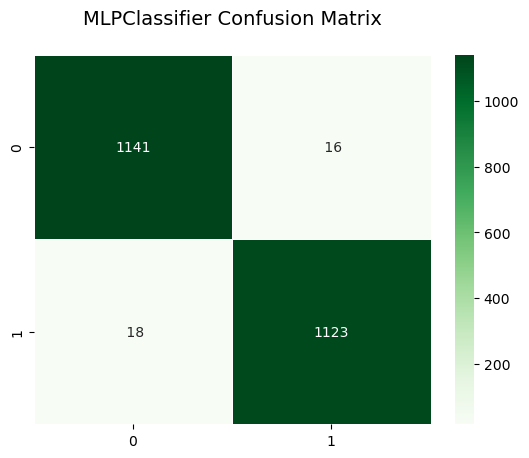

In [22]:
sns.heatmap(confusion_matrix(y_test, y_pred_final), annot=True, fmt='3g', linewidths=0.6, cmap="Greens",)
plt.title("MLPClassifier Confusion Matrix\n", fontsize=14)
plt.show()

In [23]:
y_prob = mlpc.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

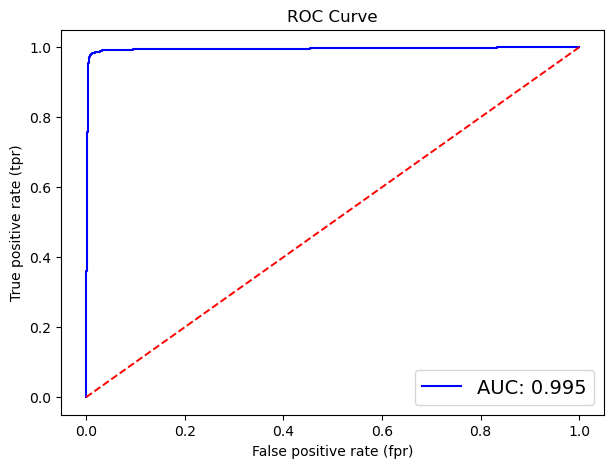

In [25]:
plt.figure(figsize=(7,5))
plt.plot(fpr, tpr, color="blue", label= f"AUC: {roc_auc:.3f}")
plt.plot([0, 1], [0, 1], color="r", linestyle="--", linewidth=1.4)
plt.legend(fontsize=14)
plt.xlabel("False positive rate (fpr)")
plt.ylabel("True positive rate (tpr)")
plt.title("ROC Curve")
plt.show()